[[ 9.70165799e+00 -6.70895001e-01]
 [-9.26683564e+00 -2.98169760e+00]
 [-1.99104399e+00  9.94520412e+00]
 [ 9.16389623e+00  4.83653093e+00]
 [-8.89576415e+00  3.23620774e+00]
 [-9.33622010e+00  1.61082135e+00]
 [ 9.14793514e+00  2.87870279e+00]
 [ 5.13318747e+00  8.47483216e+00]
 [ 6.80301003e+00  6.07026687e+00]
 [-6.84625367e+00 -7.05517147e+00]
 [ 6.62431484e+00 -8.41028646e+00]
 [-5.38071629e+00 -7.41595191e+00]
 [ 9.82746657e+00 -5.73565411e-01]
 [-1.09100907e+01  2.05630274e+00]
 [-7.09022453e+00 -6.51660222e+00]
 [-1.92251789e+00  9.23461973e+00]
 [ 1.00544963e+01 -1.52756595e+00]
 [-4.64640311e+00 -8.85177527e+00]
 [-9.80697561e+00  3.84506520e+00]
 [-2.22262131e+00  8.72768231e+00]
 [-1.00163999e+01 -6.11205532e-01]
 [ 7.65597725e+00  6.53556976e+00]
 [ 1.43472687e+00  9.83917234e+00]
 [-9.46720889e+00  1.28357904e+00]
 [ 4.60652825e-01  1.01168400e+01]
 [-8.19693749e+00  6.95797813e+00]
 [ 4.21573759e+00 -9.12602031e+00]
 [ 9.01455247e+00  4.56042932e+00]
 [ 9.06356704e+00 -4

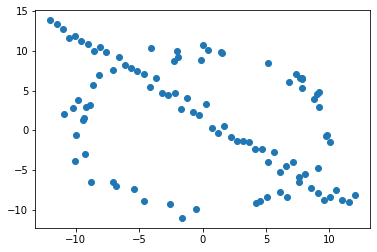

In [72]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt

np.random.seed(45)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)

n = s*np.random.randn(half_n)
t_ = 1.96*1

x , y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))




m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n ,1)))
X = np.vstack((X_circ, X_line))

plt.scatter(X[..., 0], X[..., 1] )
# plt.scatter(X_line, X)

# print(X_circ)
# print(X_line)
# print(X)

In [118]:
def define_circle(p1, p2, p3):
    """
    Returns the center and radius of the circle passing the given 3 points.
    In case the 3 points form a line, returns (None, infinity).
    """
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-6:
        return (None, np.inf)

    # Center of circle
    cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    return ((cx, cy), radius)

p = 0.8
e = 0.5
s = 3
N = np.log10(1-p)/np.log10(1-(1-e)**s)
print(N)
max_k = 0

for i in range(int(N)):
    ind1 = np.random.randint(0, half_n)
    ind2 = np.random.randint(0, half_n)
    ind3 = np.random.randint(0, half_n)
    c1 = [X[..., 0][ind1], X[..., 1][ind1]]
    c2 = [X[..., 0][ind2], X[..., 1][ind2]]
    c3 = [X[..., 0][ind3], X[..., 1][ind3]]
    # print(c1, c2, c3)
    
    cen, rad = define_circle(c1, c2, c3)
    k = 0

    for i in range(half_n):
        a, b = X[..., 0][i], X[..., 1][i]
        if cen is None: continue
        dis2 = np.sqrt((a-cen[0])**2 + (b - cen[1])**2)
        r = rad
        
        # print(dis2, r)
        if r-t_ < dis2 < r + t_:
            k+=1
    # print(k)
    # break
    if max_k < k:
        max_k = k
        f_ind1, f_ind2, f_ind3 = ind1, ind2, ind3
        f_cen, f_rad = cen, rad

print(max_k)

12.052880456056386
50
